#Header Note

Here, I have again made 2 changes in my 3rd modulated model .I have set learning rate scheduler , also made changes in the placement of dropout.

The 2 main things that I have made :
* Placement of Dropout -used only 10% of dropout
* Learning rate scheduler -- set learning rate to 0.02


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


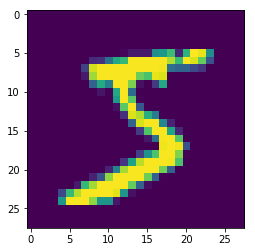

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Modulated Vanilla Architecture with Batch Normalization And Dropout

In [19]:
from keras.layers import Activation
from keras.layers import BatchNormalization

model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(10, 3, 3, activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))
model.add(Convolution2D(16, 3, 3, activation='relu')) # 22
#model.add(BatchNormalization())


model.add(MaxPooling2D(pool_size=(2, 2))) # 11

model.add(Convolution2D(10, 1, 1, activation='relu')) # 11
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3, 3, activation='relu')) # 9
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) # 7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, activation='relu')) #7
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 3,3,activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1,1,activation='relu'))#5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 5))
model.add(Flatten())
model.add(Activation('softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: User

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_25 (Batc (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_10 (Dropout)         (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 24, 24, 10)        910       
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_11 (Dropout)         (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 22, 22, 16)        1456      
__________

##NOTE

Parameters sums upto <b>9,046</b> .The other thing I did used the learning scheduler and learning rate to 0.002.

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round((0.002) * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.002), metrics=['accuracy'])

In [27]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])


Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.002.
60000/60000 [==============================] - 11s 177us/step - loss: 0.0469 - acc: 0.9852 - val_loss: 0.0255 - val_acc: 0.9923
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0015163002.
60000/60000 [==============================] - 8s 129us/step - loss: 0.0413 - acc: 0.9870 - val_loss: 0.0246 - val_acc: 0.9930
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0012210012.
60000/60000 [==============================] - 7s 115us/step - loss: 0.0384 - acc: 0.9876 - val_loss: 0.0229 - val_acc: 0.9929
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0010219724.
60000/60000 [==============================] - 7s 115us/step - loss: 0.0354 - acc: 0.9889 - val_loss: 0.0236 - val_acc: 0.9934
Epoch 5/20

Epoch 00005: LearningRateScheduler setting learning rate to 0.0008787346.
60000/60000 [=====

in the 7th epoch, its seen that 99.4 is the validation accuracy 

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [29]:
print(score)

[0.018385987428179942, 0.994]


While I print the score , it is 99.4% accuracy

In [0]:
y_pred = model.predict(X_test)

In [31]:
print(y_pred[:9])
print(y_test[:9])

[[3.35067130e-09 3.07996828e-08 6.69561643e-07 1.29245154e-06
  4.37413959e-11 1.63222630e-10 3.56268427e-13 9.99997854e-01
  5.21318821e-11 1.47784789e-07]
 [2.73458636e-06 2.17140114e-05 9.99971271e-01 7.29791338e-08
  5.75373349e-08 7.80400744e-12 3.37959676e-07 3.53217524e-06
  2.77072473e-07 1.44101658e-11]
 [1.03215946e-07 9.99992847e-01 9.57426991e-08 7.92649590e-09
  2.74293575e-06 3.56291316e-08 6.90592969e-07 2.88580304e-06
  5.08076766e-07 1.14288000e-07]
 [9.99956846e-01 2.97628437e-12 1.45583599e-08 2.17690976e-09
  2.01787298e-08 3.85516108e-09 3.98492630e-05 2.04546016e-11
  7.26543448e-08 3.30560715e-06]
 [7.48050621e-10 2.42332798e-09 6.86274024e-11 4.27963092e-14
  9.99997377e-01 3.51432251e-11 8.55346514e-08 2.55728883e-10
  1.35035538e-09 2.46719287e-06]
 [1.97638755e-07 9.99972224e-01 1.02076604e-06 2.13278617e-09
  9.50927370e-06 1.23199573e-09 4.44236399e-08 1.65656584e-05
  1.11055449e-07 1.97501222e-07]
 [6.98767363e-11 1.09303119e-05 1.10550737e-07 6.24678018e